In [1]:
%matplotlib inline
%pylab inline

import menpo.io as mio
from menpo.feature import fast_dsift, no_op
from menpo.landmark import labeller, ibug_face_66
from menpo.visualize import visualize_images

from menpofit.lk import (
    LucasKanadeFitter,
    ForwardAdditive, ForwardCompositional, InverseCompositional,
    SSD, FourierSSD, ECC, GradientImages, GradientCorrelation)
from menpofit.transform import DifferentiableAlignmentAffine
from menpofit.visualize import visualize_fitting_result

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
import IPython.display as ipydisplay
from menpo.visualize.viewmatplotlib import sample_colours_from_colourmap
from menpofit.fittingresult import plot_cumulative_error_distribution

## Load data

In [3]:
images = []
for i in mio.import_images('/vol/atlas/databases/lfpw/trainset/', 
                           verbose=True, max_images=5):
    labeller(i, 'PTS', ibug_face_66)
    i.crop_to_landmarks_proportion(0.5, group='PTS')
    i.landmarks['bounding_box'] = i.landmarks['PTS'].lms.bounding_box()
    if i.n_channels == 3:
        i = i.as_greyscale(mode='average')
    images.append(i)

Importing assets: [==========] 100% (5/5) - 00:00:00 remaining


In [4]:
template = images[0]
test_images = images

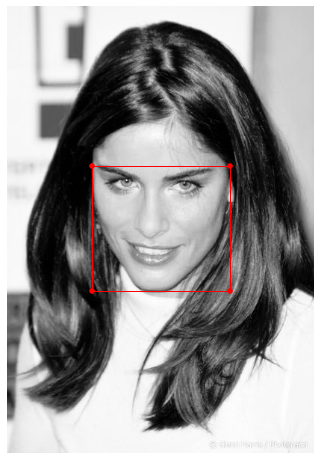

In [5]:
visualize_images(template)

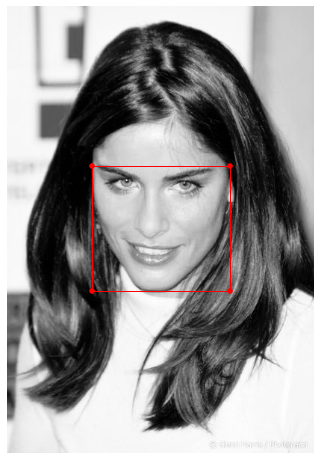

In [6]:
visualize_images(test_images)

## Build LK Fitter

In [16]:
lk_fitter = LucasKanadeFitter(
    template=template,
    group='bounding_box',
    features=no_op,
    transform_cls=DifferentiableAlignmentAffine,
    diagonal=100, 
    scales=(1, 0.5), 
    scale_features=True,
    algorithm_cls=InverseCompositional,
    residual_cls=GradientCorrelation)

## Fit LK Fitter

In [17]:
np.random.seed(seed=1)

fitter_results = []

for j, i in enumerate(test_images):
    
    gt_s = i.landmarks['bounding_box'].lms
    s = lk_fitter.noisy_shape_from_shape(gt_s, noise_std=0.04)
    
    fr = lk_fitter.fit(i, s, gt_shape=gt_s, max_iters=20) 
    fr.downscale = 0.5
    fitter_results.append(fr)
    
    print 'Image: ', j
    print fr

Image:  0
Initial error: 0.0798
Final error: 0.0020
Image:  1
Initial error: 0.0558
Final error: 0.0302
Image:  2
Initial error: 0.0359
Final error: 0.0579
Image:  3
Initial error: 0.0416
Final error: 0.0431
Image:  4
Initial error: 0.0442
Final error: 0.0680


## Visualize Results

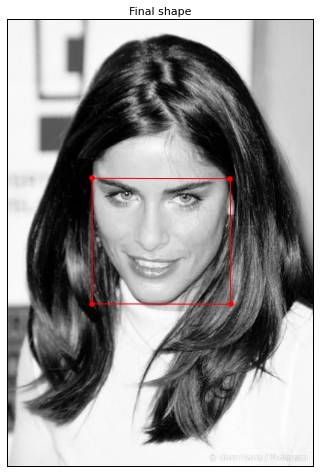

In [18]:
visualize_fitting_result(fitter_results)

In [19]:
fitter_results[0].costs

[0.39231383305877415,
 0.64896432251809988,
 0.72032594213250578,
 0.74035048054624064,
 0.75497164680985285,
 0.75827011941637068,
 0.76150496826090008,
 0.7631880327318642,
 0.76301854904136435,
 0.76301116832882421,
 0.57185734081970585,
 0.73729700837338474,
 0.79302545014182457,
 0.79687105438271244,
 0.79743529470083363,
 0.79736823206778829,
 0.79741836709061686,
 0.79746742378199986,
 0.79750065188569397,
 0.79752067941176907]

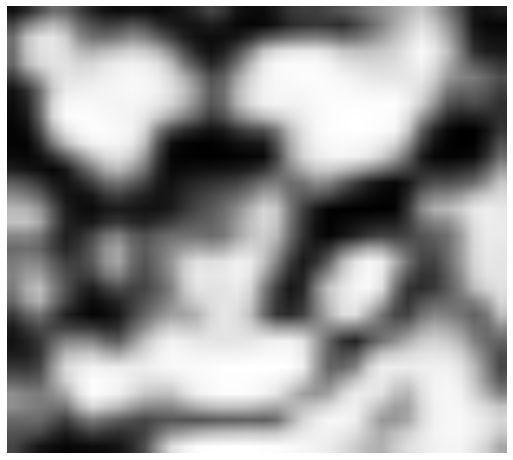

In [15]:
visualize_images(fitter_results[0].algorithm_results[0].warped_images)